In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import xgboost as xgb

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

def plot_confusion_matrix(cm, classes, normalized=True, cmap='bone'):
    plt.figure(figsize=[7, 6])
    norm_cm = cm
    if normalized:
        norm_cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        sns.heatmap(norm_cm, annot=cm, fmt='g', xticklabels=classes, yticklabels=classes, cmap=cmap)

In [2]:
data = pd.read_csv('../datasets/Frogs_MFCCs.csv')
data.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


In [3]:
data['Family'].value_counts()
data['Genus'].value_counts()
data['Species'].value_counts()
len(data['Species'].value_counts()),

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

(10,)

In [4]:
data.iloc[:, :-4].head()
data.iloc[:, -2].head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.156436,0.082245,0.135752,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.254341,0.022786,0.163320,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.237384,0.050791,0.207338,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.317084,-0.011567,0.100413,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.298524,0.037439,0.219153,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244


0    AdenomeraAndre
1    AdenomeraAndre
2    AdenomeraAndre
3    AdenomeraAndre
4    AdenomeraAndre
Name: Species, dtype: object

In [5]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(data.iloc[:, -2])
x = data.iloc[:, :-4] 

X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42, stratify=y)

X_train.shape, y_train.shape, X_test.shape, y_test.shape, 

((5396, 22), (5396,), (1799, 22), (1799,))

In [16]:
data.iloc[:, -2]

0       AdenomeraAndre
1       AdenomeraAndre
2       AdenomeraAndre
3       AdenomeraAndre
4       AdenomeraAndre
             ...      
7190       ScinaxRuber
7191       ScinaxRuber
7192       ScinaxRuber
7193       ScinaxRuber
7194       ScinaxRuber
Name: Species, Length: 7195, dtype: object

In [7]:
import xgboost as xgb

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

In [8]:
params = {
    'max_depth': 3,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 10,
    'n_gpus': 0
}

In [9]:
bst = xgb.train(params, dtrain)

In [10]:
pred = bst.predict(dtest)

In [11]:
pred.sum()
y_test.sum()
len(y_test)

4248.0

4315

1799

In [12]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred, target_names=le.classes_))

                        precision    recall  f1-score   support

        AdenomeraAndre       0.95      0.93      0.94       168
AdenomeraHylaedactylus       0.98      1.00      0.99       870
    Ameeregatrivittata       0.93      0.95      0.94       136
            HylaMinuta       0.82      0.77      0.79        78
  HypsiboasCinerascens       0.93      0.98      0.95       118
     HypsiboasCordobae       0.96      0.96      0.96       280
   LeptodactylusFuscus       0.93      0.93      0.93        67
 OsteocephalusOophagus       0.64      0.64      0.64        28
     Rhinellagranulosa       0.93      0.76      0.84        17
           ScinaxRuber       0.90      0.70      0.79        37

              accuracy                           0.95      1799
             macro avg       0.90      0.86      0.88      1799
          weighted avg       0.95      0.95      0.95      1799



In [13]:
frog_cm = confusion_matrix(y_test, pred)

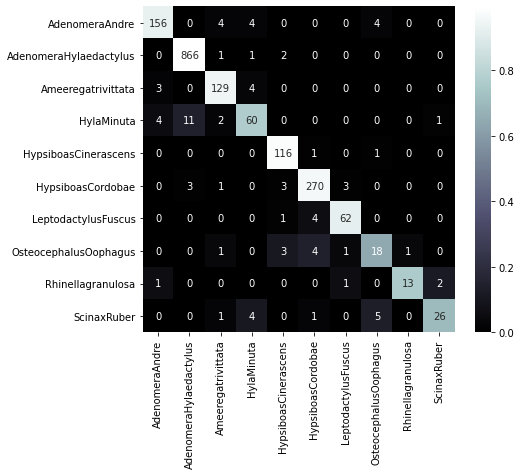

In [14]:
plot_confusion_matrix(frog_cm, classes=le.classes_)